# Lab 5 Wide and Deep Networks


## Team member
Rongwei Ji, Jonathan Mejia, Xiaoqing Zou

## Data introduction
US Census Demographic Data Data source: https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data/data

## Assigenment requriement:
You will need to convert this from regression to four levels of classification by quantizing the variable of interest.

[1 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). You have the option of using tf.dataset for processing, but it is not required. 
-----


The mushroom dataset contains categorical variables describing various features of mushrooms, along with a target variable indicating whether the mushroom is edible or poisonous. The following chart below goes more in depth of on each variable and the relationship of each value representing their description.

The data is organized as follows:

|Variable | description|
|------|---------|
|cap-shape:          |      bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
|cap-surface:        |      fibrous=f,grooves=g,scaly=y,smooth=s
|cap-color:          |      brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
|bruises:           |      bruises=t,no=f
|odor:               |      almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
|gill-attachment:     |     attached=a,descending=d,free=f,notched=n
|gill-spacing:        |     close=c,crowded=w,distant=d
|gill-size:           |     broad=b,narrow=n
|gill-color:          |     black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
|stalk-shape:         |     enlarging=e,tapering=t
|stalk-root:          |     bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
|stalk-surface-above-ring:| fibrous=f,scaly=y,silky=k,smooth=s
|stalk-surface-below-ring:| fibrous=f,scaly=y,silky=k,smooth=s
|stalk-color-above-ring: |  brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
|stalk-color-below-ring: |  brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
|veil-type:           |     partial=p,universal=u
|veil-color:          |     brown=n,orange=o,white=w,yellow=y
|ring-number:         |     none=n,one=o,two=t
|ring-type:           |     cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
|spore-print-color:   |     black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
|population:          |    abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
|habitat:             |     grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
|**class (target):** |     p = Poisonous, e = Edible

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder

# gathers data from CSV file
mushrooms = pd.read_csv('mushrooms.csv')

mushrooms.replace(to_replace='?', value=np.nan, inplace = True)
mushrooms.dropna(inplace=True)
mushrooms.reset_index()

print(mushrooms.shape)

# One-hot encode categorical variables
mushrooms_encoded = pd.get_dummies(mushrooms.drop(columns='class'))
print(mushrooms_encoded.shape)
# Target variable
if mushrooms['class'].dtype=='object':
    # encode the label of target as an integer
    tmp = LabelEncoder()
    mushrooms['class'] = tmp.fit_transform(mushrooms['class'])

# Describe final dataset
final_dataset = mushrooms_encoded.join(mushrooms['class'])

final_dataset.shape

(5644, 23)
(5644, 98)


(5644, 99)

[1 points] Identify groups of features in your data that should be combined into cross-product features. Provide a compelling justification for why these features should be crossed (or why some features should not be crossed). 
-----------

In the mushroom dataset, there are several groups of features that could be combined into cross-product features. However, it's important to consider the nature of the features and whether combining them would result in meaningful interactions. Here are some potential groups of features and their justifications for being crossed or not:

## Cap Features (Cap Shape, Cap Surface, Cap Color):

Justification for crossing: These features describe different aspects of the mushroom cap. Cross-producting them might capture interactions between the shape, surface, and color of the cap, potentially revealing patterns specific to certain combinations that could be indicative of edibility or toxicity.

Justification against crossing: While these features describe aspects of the mushroom cap, their individual characteristics might be more informative than their interactions. For example, a specific cap color or shape might be more strongly associated with toxicity regardless of the surface texture.


## Gill Features (Gill Attachment, Gill Spacing, Gill Size, Gill Color):

Justification for crossing: These features pertain to the gills, which play a crucial role in spore production and distribution. Combining them could reveal how different combinations of gill characteristics influence the toxicity of mushrooms.

Justification against crossing: Gill characteristics might already capture sufficient information individually, and combining them into cross-products could lead to a high-dimensional feature space without significant improvement in predictive performance.


## Stalk Features (Stalk Shape, Stalk Root, Stalk Surface Above/Below Ring, Stalk Color Above/Below Ring):

Justification for crossing: Stalk features describe various attributes of the mushroom stalk, and their interactions might provide insights into the overall structure and health of the mushroom. Certain combinations might be indicative of specific species or toxicity levels.

Justification against crossing: Stalk features might be diverse enough on their own to capture relevant information about the mushroom. Cross-producting them could introduce noise or create overly complex interactions that are difficult to interpret.


## Ring Features (Veil Type, Veil Color, Ring Number, Ring Type):

Justification for crossing: Ring features relate to structures like the veil and ring on the mushroom, which can vary significantly between species. Combining them might reveal associations between different aspects of these structures and the mushroom's toxicity.

Justification against crossing: These features might not interact in ways that significantly impact the mushroom's toxicity. Each feature could independently contribute valuable information without the need for cross-products.


Ultimately, the decision to cross certain features depends on domain knowledge, experimentation, and the specific goals of the analysis. While some interactions may enhance predictive power, others may not provide meaningful insights or could even introduce noise into the model.

[1 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.
---------

A more suitable metric for evaluating the algorithm's performance on imbalanced datasets like this one is the F1 score, specifically the weighted average of the F1 score for each class. The F1 score considers both precision and recall, making it a robust metric for evaluating classification performance, especially when there is class imbalance.

Here's why the F1 score is appropriate for this task:

Consideration of Precision and Recall: The F1 score balances precision and recall, which are crucial in binary classification tasks like identifying edible and poisonous mushrooms. Precision measures the proportion of true positive predictions among all positive predictions, while recall measures the proportion of true positive predictions among all actual positive instances. Both precision and recall provide valuable insights into the model's performance.

Handling Imbalanced Data: Since the mushroom dataset likely contains imbalanced classes (i.e., more edible mushrooms than poisonous ones or vice versa), the F1 score accounts for this imbalance by considering both false positives and false negatives. It provides a more accurate assessment of the model's ability to correctly classify instances from both classes.

Business Relevance: Misclassifying a poisonous mushroom as edible (false negative) can have severe consequences, potentially leading to health risks or even fatalities. Similarly, misclassifying an edible mushroom as poisonous (false positive) can result in unnecessary waste or loss. Therefore, it's essential to strike a balance between minimizing false negatives and false positives, which the F1 score addresses effectively.

Interpretability: The F1 score is easy to interpret and communicate, making it suitable for explaining the model's performance to stakeholders or decision-makers who may not be familiar with technical details of machine learning.

In summary, the F1 score is a suitable metric for evaluating the algorithm's performance on the mushroom dataset due to its consideration of precision, recall, handling of imbalanced data, relevance to the business case, and interpretability.

[1 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Argue why your cross validation method is a realistic mirroring of how an algorithm would be used in practice. Use the method to split your data that you argue for. 
--------

For dividing the data into training and testing sets, I would recommend using stratified k-fold cross-validation, specifically with k=5 or k=10. Here's why this method is appropriate:

Handling Imbalanced Data: Since the mushroom dataset likely contains imbalanced classes (i.e., more edible mushrooms than poisonous ones or vice versa), stratified k-fold cross-validation ensures that each fold preserves the same class distribution as the original dataset. This helps prevent bias in model evaluation and ensures that the model's performance is representative across all classes.

Robustness: Cross-validation provides a more robust estimate of model performance compared to a single train-test split. It reduces the variability in performance metrics that can arise from random variations in the training and testing data splits.

Realistic Reflection of Model Deployment: Stratified k-fold cross-validation simulates how the model would generalize to unseen data in practice. It iteratively trains the model on different subsets of the data and evaluates its performance on independent validation sets. This process mimics how the model would be deployed in real-world scenarios where it encounters new, unseen instances.

Now, let's use stratified k-fold cross-validation to split the mushroom dataset into training and testing sets:

In [36]:
from sklearn.model_selection import StratifiedKFold

# Features and target
X = mushrooms_encoded
y = mushrooms['class']

print(y.size)

# Initialize StratifiedKFold with k=5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Split the data into training and testing sets
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Output the sizes of training and testing sets for validation
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


5644
Training set size: 4516
Testing set size: 1128


This code snippet divides the data into five stratified folds while shuffling the data to ensure randomness. It then outputs the sizes of the resulting training and testing sets. Using stratified k-fold cross-validation provides a realistic estimation of the model's performance on unseen data while mitigating issues related to class imbalance and variability in model evaluation.

[2 points] Create at least three combined wide and deep networks to classify your data using Keras (this total of "three" includes the model you will train in the next step of the rubric). Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations. Note: you can use the "history" return parameter that is part of Keras "fit" function to easily access this data.
-----------

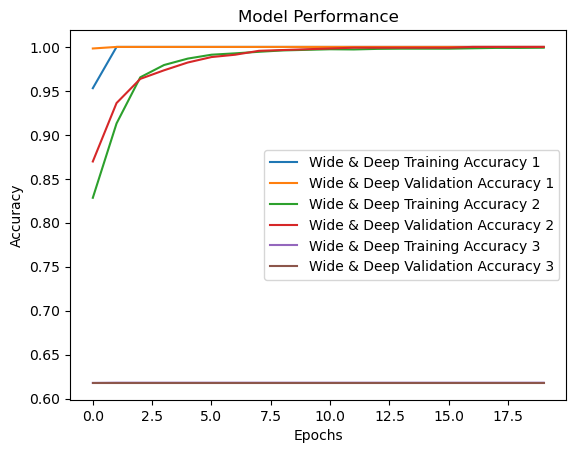

In [97]:
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense, Concatenate


# Define input dimension
input_dim = X_train.shape[1]

# Define combined wide and deep network
# Adam adjust Adaptive Learning Rates

def create_wide_deep_network_1():
    input_layer = Input(shape=(input_dim,))
    wide_layer = Dense(32, activation='relu')(input_layer)
    hidden_layer1 = Dense(64, activation='relu')(input_layer)
    hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)
    concat_layer = Concatenate()([wide_layer, hidden_layer2])
    output_layer = Dense(1, activation='sigmoid')(concat_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Stochastic Gradient Descent

def create_wide_deep_network_2():
    input_layer = Input(shape=(input_dim,))
    wide_layer = Dense(32, activation='relu')(input_layer)
    hidden_layer1 = Dense(64, activation='relu')(input_layer)
    hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)
    concat_layer = Concatenate()([wide_layer, hidden_layer2])
    output_layer = Dense(1, activation='sigmoid')(concat_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Follow The Regularized Leader

def create_wide_deep_network_3():
    input_layer = Input(shape=(input_dim,))
    wide_layer = Dense(32, activation='relu')(input_layer)
    hidden_layer1 = Dense(64, activation='relu')(input_layer)
    hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)
    concat_layer = Concatenate()([wide_layer, hidden_layer2])
    output_layer = Dense(1, activation='sigmoid')(concat_layer)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='Ftrl', loss='binary_crossentropy', metrics=['accuracy'])
    return model



# Create and train combined wide and deep network
model = create_wide_deep_network_1()
wide_deep_history_1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=0)

# Create and train combined wide and deep network
wide_deep_model_2 = create_wide_deep_network_2()
wide_deep_history_2 = wide_deep_model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=0)

# Create and train combined wide and deep network
wide_deep_model_3 = create_wide_deep_network_3()
wide_deep_history_3 = wide_deep_model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=0)


# Visualize performance
plt.plot(wide_deep_history_1.history['accuracy'], label='Wide & Deep Training Accuracy 1')
plt.plot(wide_deep_history_1.history['val_accuracy'], label='Wide & Deep Validation Accuracy 1')
plt.plot(wide_deep_history_2.history['accuracy'], label='Wide & Deep Training Accuracy 2')
plt.plot(wide_deep_history_2.history['val_accuracy'], label='Wide & Deep Validation Accuracy 2')
plt.plot(wide_deep_history_3.history['accuracy'], label='Wide & Deep Training Accuracy 3')
plt.plot(wide_deep_history_3.history['val_accuracy'], label='Wide & Deep Validation Accuracy 3')

plt.title('Model Performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

[2 points] Investigate generalization performance by altering the number of layers in the deep branch of the network. Try at least two models (this "two" includes the wide and deep model trained from the previous step). Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab to answer: What model with what number of layers performs superiorly? Use proper statistical methods to compare the performance of different models.
-----

In [62]:
# now lets see how well the model performed
from sklearn import metrics as mt
yhat_proba_1 = wide_deep_model_1.predict(X_test) # sigmoid output probabilities
yhat_1 = np.round(yhat_proba_1) # round to get binary class
yhat_proba_2 = wide_deep_model_2.predict(X_test) # sigmoid output probabilities
yhat_2 = np.round(yhat_proba_2) # round to get binary class
yhat_proba_3 = wide_deep_model_3.predict(X_test) # sigmoid output probabilities
yhat_3 = np.round(yhat_proba_3) # round to get binary class
#Unable to diplay matrix
#print(mt.confusion_matrix(y_test,yhat_1))
print("\nOptimizer Used: Adam Optimizer")
print("-----------------------------------------------------")
print(mt.classification_report(y_test,yhat_1))
#print(mt.confusion_matrix(y_test,yhat_2))
print("\nOptimizer Used: Stochastic Gradient Descent Optimizer")
print("-----------------------------------------------------")
print(mt.classification_report(y_test,yhat_2))
#print(mt.confusion_matrix(y_test,yhat_3))
print("\nOptimizer Used: Follow The Regularized Leader")
print("-----------------------------------------------------")
print(mt.classification_report(y_test,yhat_3))

36/36 [==============================] - 0s 364us/step

Optimizer Used: Adam Optimizer
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       697
           1       1.00      1.00      1.00       431

    accuracy                           1.00      1128
   macro avg       1.00      1.00      1.00      1128
weighted avg       1.00      1.00      1.00      1128


Optimizer Used: Stochastic Gradient Descent Optimizer
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       697
           1       1.00      0.99      1.00       431

    accuracy                           1.00      1128
   macro avg       1.00      1.00      1.00      1128
weighted avg       1.00      1.00      1.00      1128


Optimizer Used: Follow The Regularized Leader
-------------------------------------------------

[1 points] Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). Alternatively, you can compare to a network without the wide branch (i.e., just the deep network). For classification tasks, compare using the receiver operating characteristic and area under the curve. For regression tasks, use Bland-Altman plots and residual variance calculations.  Use proper statistical methods to compare the performance of different models.  
-----

In [89]:
from sklearn import __version__ as sklearn_version
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# MLP 
# these values have been hand tuned
# sigmoid with SGD, batching, nesterov's momentum, 
# L2, adaptive learning rate
def create_mlp():
    clf = MLPClassifier(hidden_layer_sizes=(50,), 
                    activation='logistic', # compare to sigmoid
                    solver='sgd', 
                    alpha=1e-4, # L2 penalty
                    batch_size=98, # min of 98, num_samples
                    learning_rate='adaptive', # decrease rate if loss goes up
                    learning_rate_init=0.1, # only SGD
                    power_t=0.5,    # only SGD with inverse scaling
                    max_iter=100, 
                    shuffle=True, 
                    random_state=1, 
                    tol=1e-9, # for stopping
                    verbose=False, 
                    momentum=0.9, # only SGD
                    nesterovs_momentum=True, # only SGD
                    early_stopping=False, 
                    validation_fraction=0.1, # only if early_stop is true
                    beta_1=0.9, # adam decay rate of moment
                    beta_2=0.999, # adam decay rate of moment
                    epsilon=1e-08) # adam numerical stabilizer

%time 

# print('Validation Acc:',accuracy_score(yhat,y_test))

# Create and train combined wide and deep network
mlp = create_mlp()
# Fit the best wide and deep network
mlp = clf.fit(X_train,y_train)
# Predict probabilities for the best wide and deep network
y_pred_proba_mlp = mlp.predict_proba(X_test)
# Compute ROC curve and AUC for wide and deep network
fpr_wide_deep, tpr_wide_deep, _ = roc_curve(y_test, y_pred_proba_mlp)
roc_auc_wide_deep = auc(fpr_wide_deep, tpr_wide_deep)



# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_wide_deep, tpr_wide_deep, color='blue', lw=2, label='Wide and Deep (AUC = %0.2f)' % roc_auc_wide_deep)
plt.plot(fpr_deep, tpr_deep, color='red', lw=2, label='Deep (AUC = %0.2f)' % roc_auc_deep)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

CPU times: user 1e+03 ns, sys: 2 µs, total: 3 µs
Wall time: 11 µs


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


ValueError: y should be a 1d array, got an array of shape (1128, 2) instead.

Exceptional Work (1 points total)
----
5000 students: You have free reign to provide additional analyses.
----
One idea (required for 7000 level students): Capture the embedding weights from the deep network and (if needed) perform dimensionality reduction on the output of these embedding layers (only if needed). That is, pass the observations into the network, save the embedded weights (called embeddings), and then perform  dimensionality reduction in order to visualize results. Visualize and explain any clusters in the data.
------

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x2ccf70860>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x2ccf70860>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x2ccf70860>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
142/142 [==============================] - 0s 705us/step


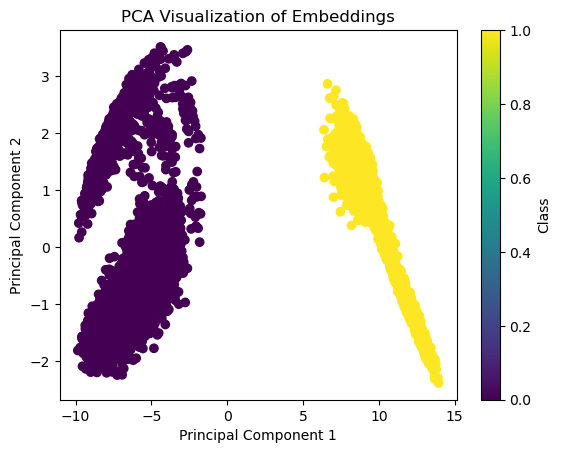

In [104]:
embedding_model = Model(inputs=model.input, outputs=model.get_layer('concatenate_84').output)  # Assuming 'dense_3' is the layer before concatenation
embeddings = embedding_model.predict(X_train)

# Step 5: Perform Dimensionality Reduction (if needed)
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

# Step 6: Visualize the Embeddings
plt.scatter(embeddings_pca[:,0], embeddings_pca[:,1], c=y_train, cmap='viridis')
plt.title('PCA Visualization of Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()
